# 臺灣河川污染狀況

本資料依淡水河統計重要河川監測結果，採用河川污染指數(River Pollution Index, RPI)，以水中溶氧量(DO)、生化需氧量(BOD5)、懸浮固體(SS)與氨氮(NH3-N）等4項水質參數之濃度值，來計算指數積分值，並分為未(稍)受污染、輕度污染、中度污染、嚴重污染等4種分類估算其河川長度。

## 隨機比較五條知名臺灣河流的污染程度（2017）
* 淡水河系 (TamSui)
* 曾文溪 (ZengWen)
* 大甲溪 (DaJia)
* 頭前溪 (TouQian)
* 鳳山溪 (FengShan)

In [239]:
# Make your plot output stored in the notebook.
%matplotlib inline

import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

dat = pandas.read_csv('river_pollution.csv')
dat

,RPI,TamSui,ZengWen,DaJia,TouQian,FengShan
0,RPI<=2.0,231.5,111.0,140.2,55.3,38.9
1,2.0<RPI<=3.0,31.5,23.8,0.0,2.4,4.1
2,3.1<RPI<=6.0,48.7,3.7,0.0,5.3,2.4
3,RPI>6.0,11.7,0.0,0.0,0.0,0.0


In [277]:
# We'll draw each RPI one by one later by calling plt.bar()
names = list(dat.columns)[1:]

rpis = [list(dat.iloc[x])[1:] for x in range(0, len(dat))]

legend = list(dat[dat.columns[0]])

colors = ['#A3E0CE', '#E0D6A3', '#DF955B', '#FF7E6D']

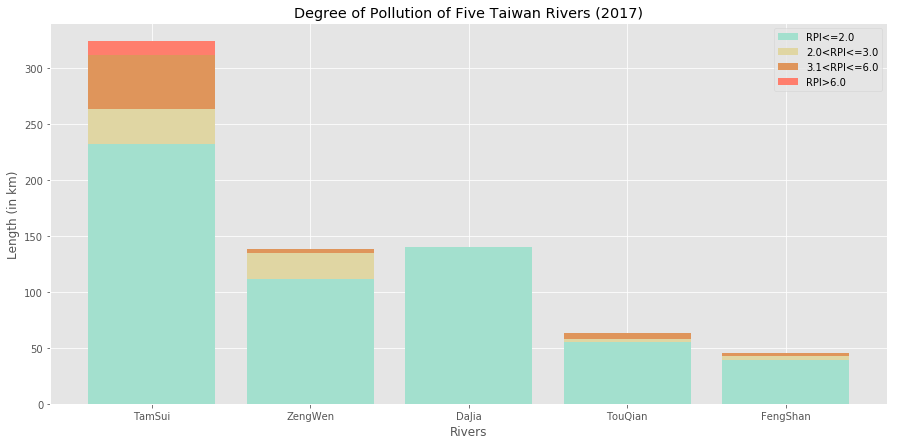

In [296]:
plt.figure(figsize=(15, 7))
plt.bar(names, rpis[0], color=colors[0])
plt.bar(names, rpis[1], bottom=np.array(rpis[0]), color=colors[1])
plt.bar(names, rpis[2], bottom=np.array(rpis[0]) + np.array(rpis[1]), color=colors[2])
plt.bar(names, rpis[3], bottom=np.array(rpis[0]) + np.array(rpis[1]) + np.array(rpis[2]), color=colors[3])
plt.xlabel('Rivers')
plt.ylabel('Length (in km)')
plt.legend(legend)
plt.title('Degree of Pollution of Five Taiwan Rivers (2017)')
plt.show()

## 使用圓餅圖分析淡水河之組成（2017）
由於淡水河 RPI > 6.0 的比例明顯最高，因此我們選擇分析淡水河之組成。

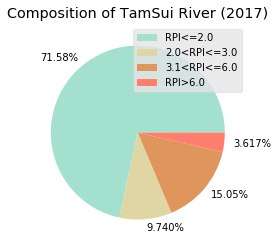

In [295]:
compositions = list(dat.TamSui)
total_length = sum(compositions)
percentages = [str(c / total_length * 100)[:5] + '%' for c in compositions]

plt.pie(compositions, labels=percentages, colors=colors)
plt.title('Composition of TamSui River (2017)')
plt.legend(legend)
plt.show()

## 分析淡水河 RPI > 6.0 佔整條河流比例之變化（2014~2017）
RPI > 6.0 / total_length

In [299]:
tamsui_dat = pandas.read_csv('tamsui.csv')
tamsui_dat

,RPI,2014,2015,2016,2017
0,RPI<=2.0,231.9,226.2,242.2,231.5
1,2.0<RPI<=3.0,24.2,21.7,23.4,31.5
2,3.1<RPI<=6.0,42.6,53.5,48.5,48.7
3,RPI>6.0,17.6,22.0,9.3,11.7


In [310]:
# 2014, 2015, 2016, 2017 resp.
pollution_pect = [i / total_length * 100 for i in list(tamsui_dat.iloc[3])[1:]]
pollution_pect

[5.4421768707483, 6.802721088435375, 2.8756957328385906, 3.6178107606679033]

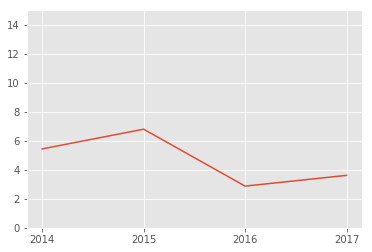

In [317]:
years = ['2014', '2015', '2016', '2017']
plt.plot(years, pollution_pect)
plt.ylim(0, 15)
plt.show()

我們可以看見淡水河在2015年時，污染最爲嚴重，而自從2016年起有明顯改善。